In [14]:
! .././ns3 run project.cc  -- --transportProtocol=ns3::TcpCubic

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
RESULTS_DIR = '../results/flow_stats.csv'

In [43]:
data = pd.read_csv(RESULTS_DIR)
data

,Flow ID,Time,Throughput,Window Size,Packets Dropped,Fairness
0,0 (10.1.1.1 -> 10.2.1.2),0.561135,0.009752,11,0,0.410643
1,1 (10.1.2.1 -> 10.2.2.2),0.702248,0.007792,11,0,0.522931
2,2 (10.1.3.1 -> 10.2.2.2),0.843362,0.006488,11,0,0.654054
3,0 (10.1.1.1 -> 10.2.1.2),1.184470,0.008510,12,0,0.578569
4,1 (10.1.2.1 -> 10.2.2.2),1.325590,0.007604,12,0,0.611566
...,...,...,...,...,...,...
838,0 (10.1.1.1 -> 10.2.1.2),239.337000,0.000928,46,87,0.987594
839,0 (10.1.1.1 -> 10.2.1.2),239.483000,0.000927,45,87,0.987498
840,0 (10.1.1.1 -> 10.2.1.2),239.625000,0.000927,45,87,0.987400
841,2 (10.1.3.1 -> 10.2.2.2),239.766000,0.000926,51,70,0.987316


In [51]:
def generate_subplot(ax: list[plt.Axes], flow_id: int, time: list[object], data: list[object], color: str, label: str, offset: int):
    ax.append(ax[0].twinx())
    ax[-1].plot(time, data, label=f'Flow ID: {flow_id}', color=color)
    ax[-1].set_ylabel(label, color=color)
    ax[-1].tick_params('y', colors=color)
    ax[-1].spines['right'].set_position(('outward', offset))

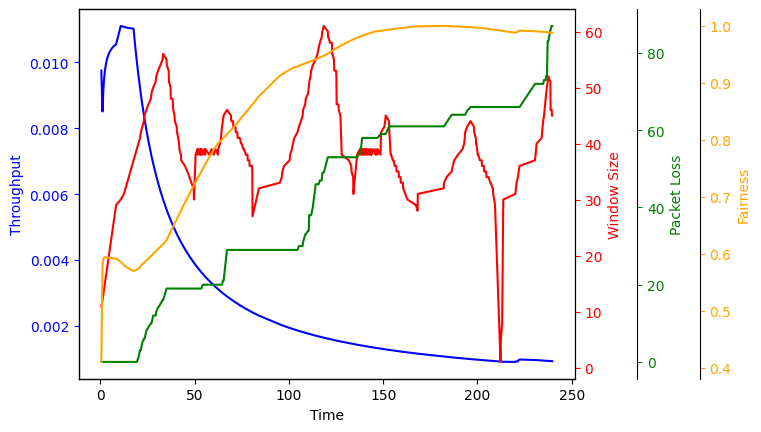

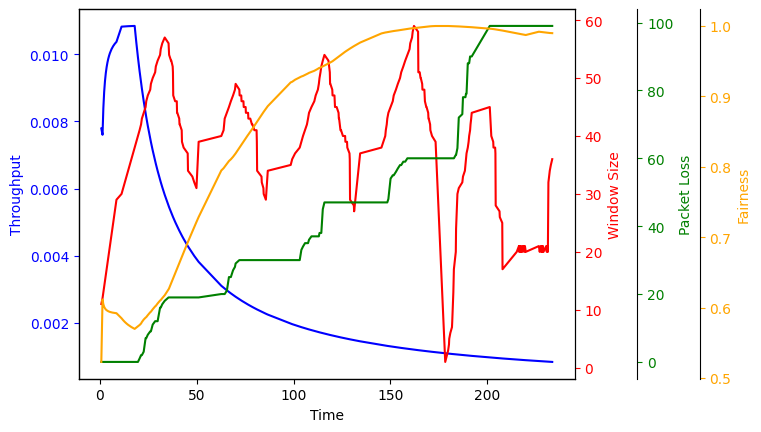

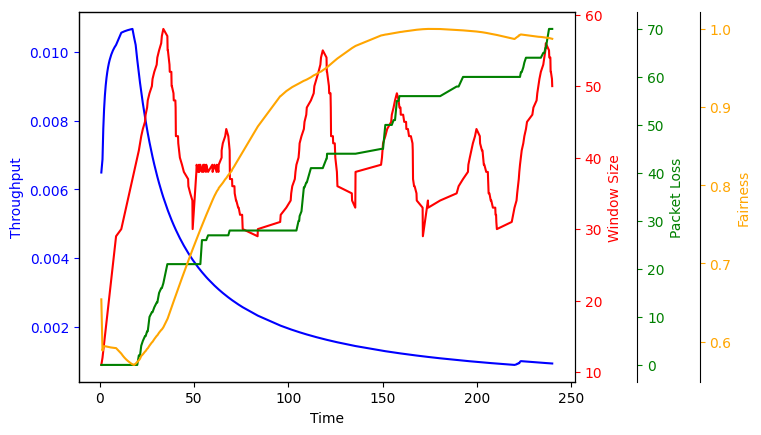

In [53]:
flow_ids = data['Flow ID'].unique()

for flow_id in flow_ids:
    flow_data = data[data['Flow ID'] == flow_id]

    time = flow_data['Time']
    throughput = flow_data['Throughput']
    window_size = flow_data['Window Size']
    packet_loss = flow_data['Packets Dropped']
    fairness = flow_data['Fairness']

    fig, ax1 = plt.subplots()
    ax = [ax1]

    color = 'blue'
    ax[-1].plot(time, throughput, label=f'Flow ID: {flow_id}', color=color)
    ax[-1].set_xlabel('Time')
    ax[-1].set_ylabel('Throughput', color=color)
    ax[-1].tick_params('y', colors=color)

    generate_subplot(ax, flow_id, time, window_size, 'red', 'Window Size', 0)
    generate_subplot(ax, flow_id, time, packet_loss, 'green', 'Packet Loss', 45)
    generate_subplot(ax, flow_id, time, fairness, 'orange', 'Fairness', 90)
    
    # Display the plot
    plt.show()
    plt.close()